In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data

In [4]:
data = pd.read_csv('data/ds_sal_data.csv')
data.head()

work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3             USD  212000         212000      United States           Senior   
4             USD   93300          93300      United States           Senior   

  employment_type work_setting company_location company_size  
0       Full-time       Hybrid          Germany            L  
1       Full-time    In-person    United States            M  
2       Full-time    In-person    United States            M  
3       Full-time    In-person    United States            M  
4       Full-time    In-person    United States            M

In [5]:
data.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [6]:
data.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

# EDA

In [7]:
import plotly.express as px

## JB_C

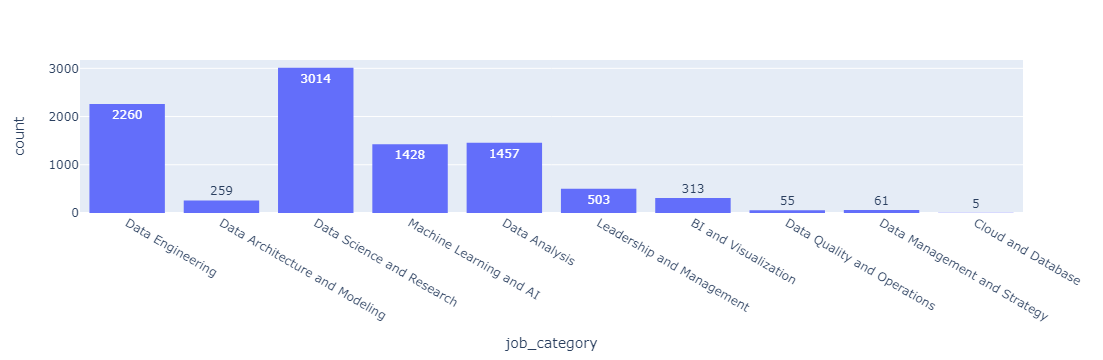

In [39]:
fig = px.histogram(data,x='job_category',text_auto=True)
fig.show()

## JB_T x JB_C

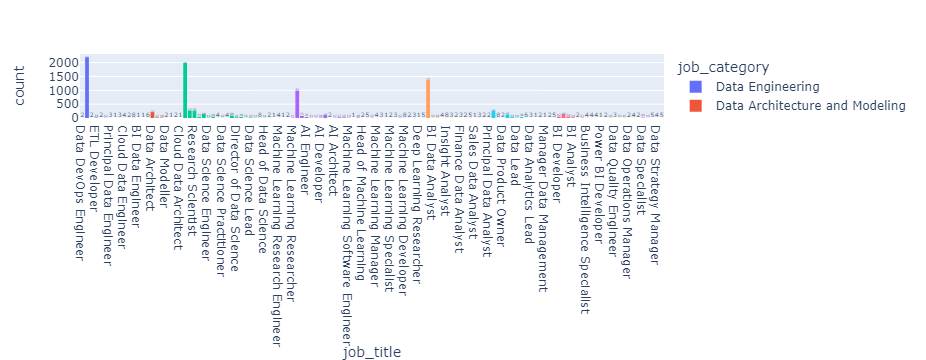

In [38]:
fig = px.histogram(data,x='job_title',color='job_category',text_auto=True)
fig.show()

## sal_c

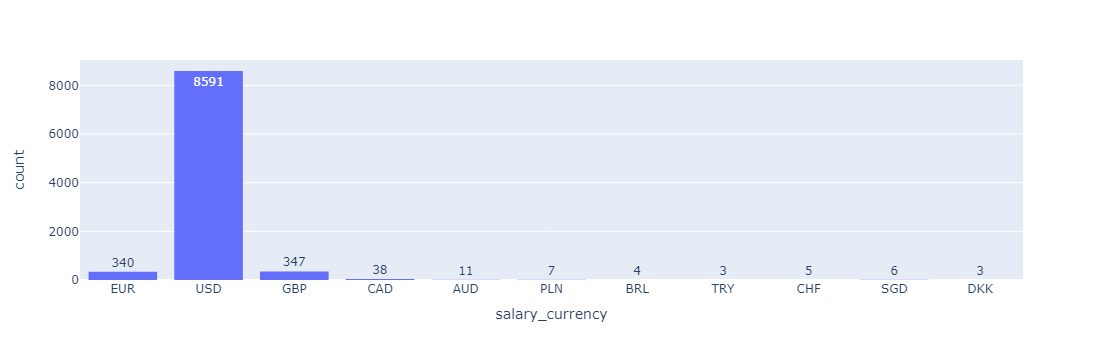

In [37]:
fig = px.histogram(data,x='salary_currency',text_auto=True)
fig.show()

## JB x SAL

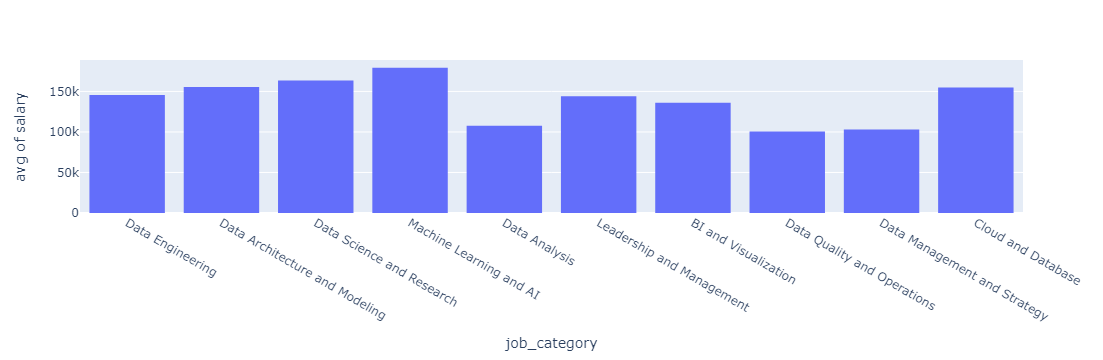

In [27]:
fig = px.histogram(data,x='job_category',y='salary',histfunc='avg')
fig.show()

## EMP_TYPE

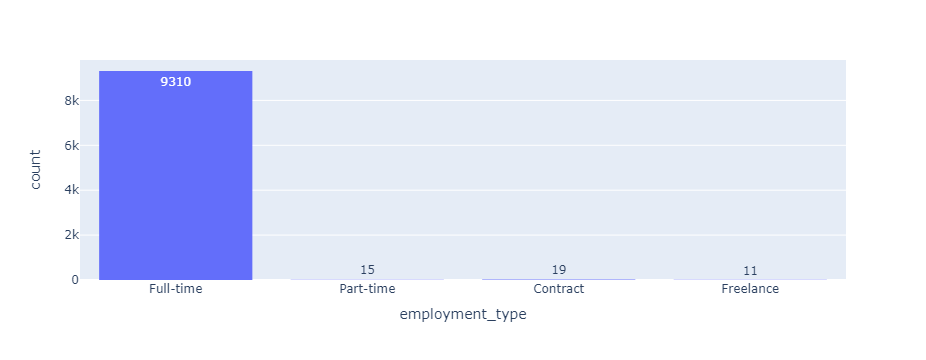

In [36]:
fig = px.histogram(data,x='employment_type',text_auto=True)
fig.show()

## emp_type x sal

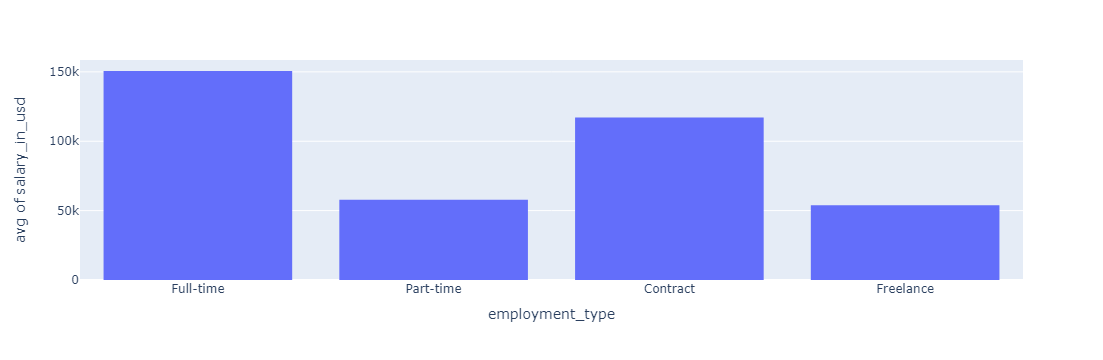

In [34]:
fig = px.histogram(data,x='employment_type',y='salary_in_usd',histfunc='avg')
fig.show()

## Comp_siz x sal

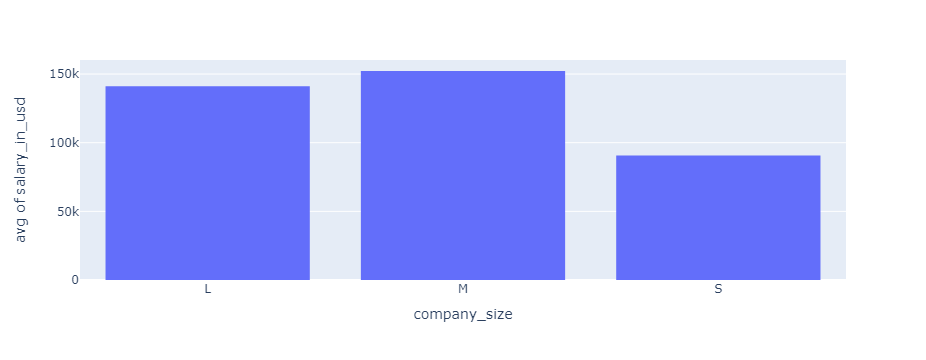

In [42]:
fig = px.histogram(data,x='company_size',y='salary_in_usd',histfunc='avg')
fig.show()

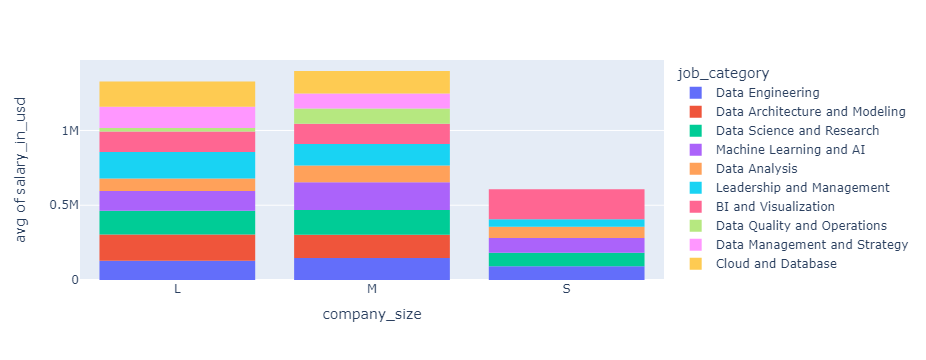

In [43]:
fig = px.histogram(data,x='company_size',y='salary_in_usd',color='job_category',histfunc='avg',template=)
fig.show()

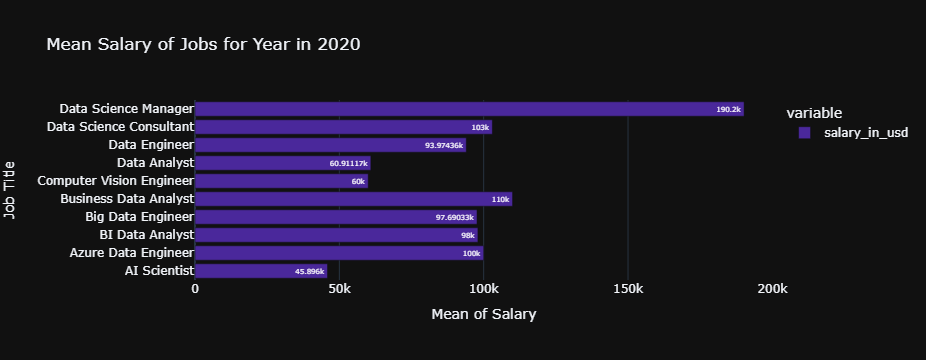

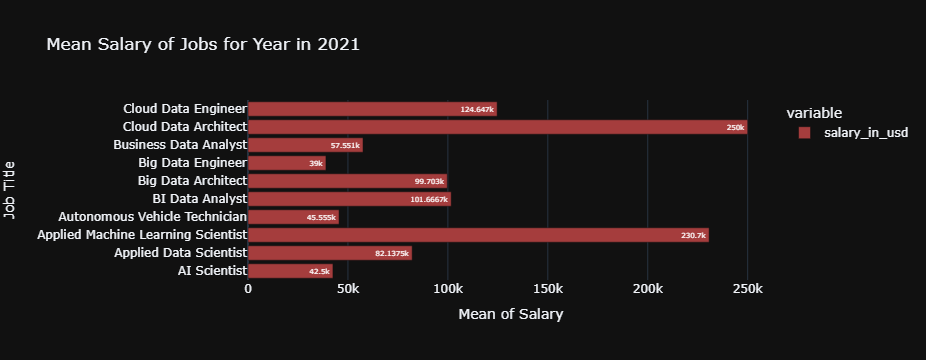

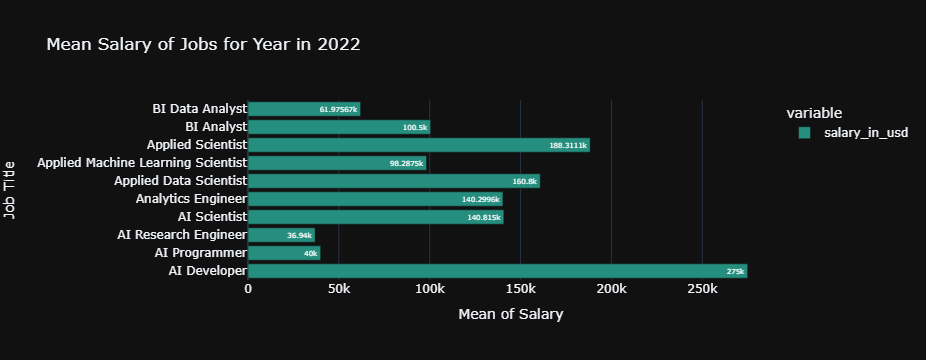

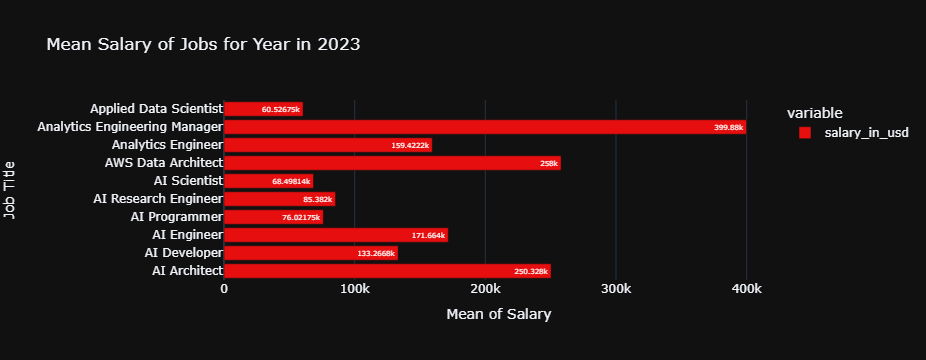

In [40]:
df_salary_in_usd = data.groupby(['work_year','job_title'])['salary_in_usd'].mean()
colors = ['#4a289b', '#a53d3d', '#268e7e', '#e60e0e']
j = 0
for i in range(2020,2024):
    fig=(px.bar(df_salary_in_usd.get(i)[:10],
                 labels={'job_title':'Job Title','value':'Mean of Salary'},
                 title=f"Mean Salary of Jobs for Year in {i}",
                 color_discrete_sequence=[colors[j]],
                 template='plotly_dark',
                 text_auto=True,
                 orientation='h'
                 ))
    fig.show()
    j+=1

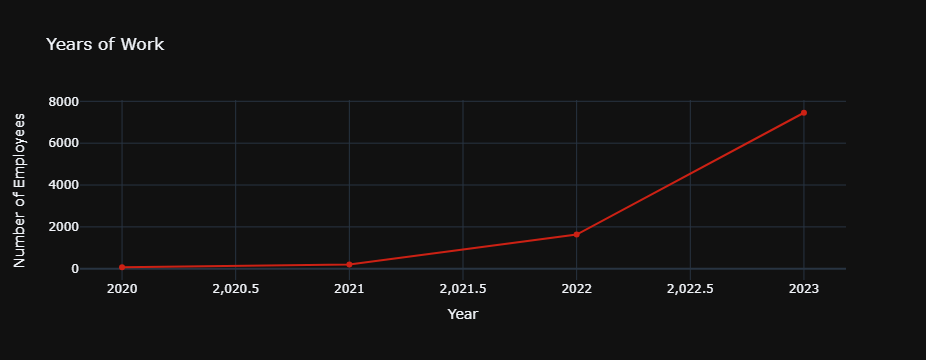

In [41]:
fig = (px.line(x = data['work_year'].value_counts().index,
              y = data['work_year'].value_counts().values,
              markers=True,
              labels={'x':'Year','y':'Number of Employees'},
              title='Years of Work',
              line_shape="linear",
              color_discrete_sequence=['#cc2114'],
              template='plotly_dark'
              ))
fig.show()

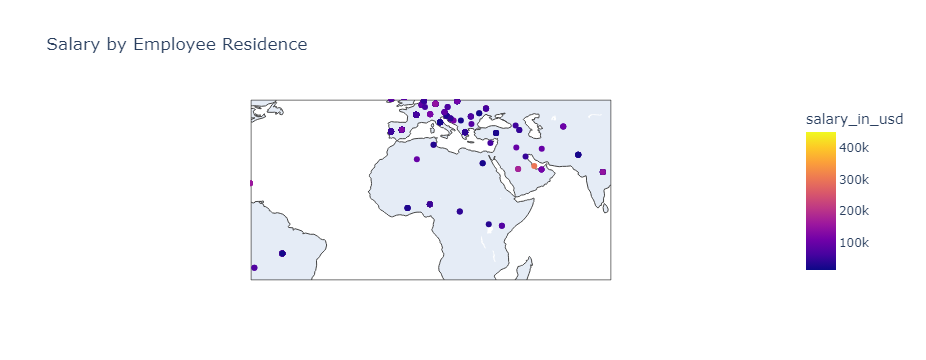

In [43]:
fig = px.scatter_geo(data, 
                     locations='employee_residence',
                     locationmode='country names',
                     color='salary_in_usd',
                     hover_name='employee_residence',
                     title='Salary by Employee Residence',                    
)
fig.show()

## Work Setting

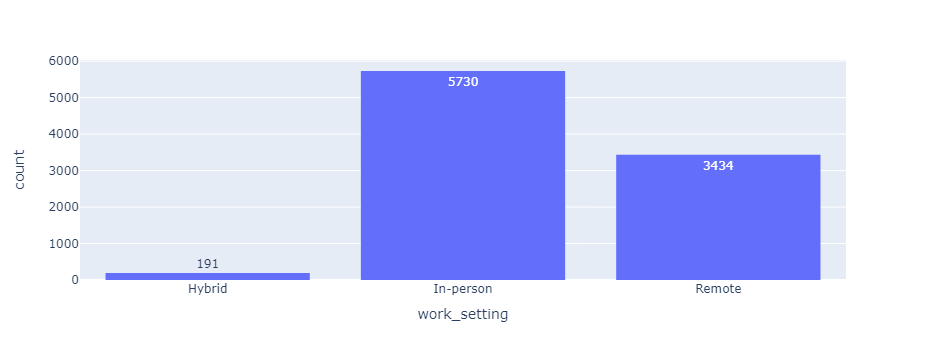

In [44]:
fig = px.histogram(data,x='work_setting',text_auto=True)
fig.show()